In [61]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import joblib
import torch
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# values
path = "/content/drive/MyDrive/ml/StudentPerformanceFactors.csv"
feature_list = ['Hours_Studied', 'Attendance', 'Extracurricular_Activities', 'Sleep_Hours', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
test_size = 0.2
val_size = 0.5

In [63]:
def upload_dataset(path, feature_list):
  data = pd.read_csv(path)
  or_df = pd.DataFrame(data)
  df = or_df[feature_list]
  X = df.iloc[:, :-1]
  y = df.iloc[:, -1]
  return X, y

def split_dataset(X, y, test_size, val_size):
  X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=42)
  X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=val_size, random_state=42)
  return X_train, X_val, X_test, y_train, y_val, y_test

In [64]:
class multiregressionmodel:
  def __init__(self, degree: int):
    self.model = LinearRegression()
    self.poly = PolynomialFeatures(degree)

  def train(self, x, y):
    x = self.poly.fit_transform(x)
    y = y.values.reshape(-1, 1)
    self.model.fit(x, y)

  def predict(self, x):
    x = self.poly.fit_transform(x)
    return self.model.predict(x)

In [65]:
model = joblib.load('/content/drive/MyDrive/ml/polynomial_model.joblib')

In [66]:
X, y = upload_dataset(path, feature_list)

# one-hot encoding
X = pd.get_dummies(X, columns=['Extracurricular_Activities'], drop_first=True)

X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(X, y, test_size, val_size)

In [67]:
def val_visualize(X_test, y_test, model):
  plt.figure(figsize=(10, 6))
  pred = model.predict(X_val)
  plt.scatter(y_val, pred, alpha=0.5, label='Actual vs Predicted')
  plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label='Ideal Prediction (y=x)') # Diagonal line for ideal prediction
  plt.xlabel('Actual Exam Score')
  plt.ylabel('Predicted Exam Score')
  plt.title('Actual vs Predicted Exam Scores')
  plt.legend()
  plt.grid(True)
  plt.show()

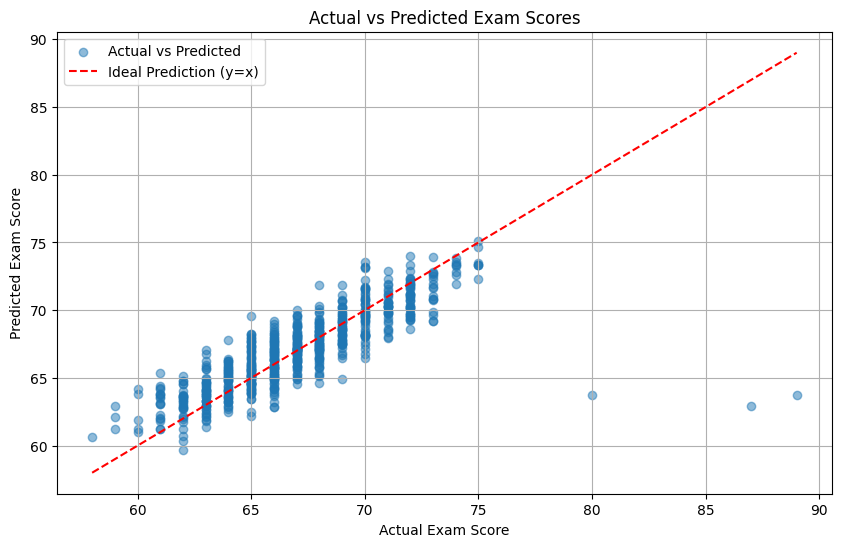

In [68]:
val_visualize(X_test=X_test, y_test=y_test, model=model)

- validation 확인 -> 모델 그대로 평가

In [69]:
def eval(X_test, y_test, model):
  y_pred = model.predict(X_test).flatten()
  mse = np.mean((y_test - y_pred) ** 2)
  mae = np.mean(np.abs(y_test - y_pred))
  r2 = np.corrcoef(y_test, y_pred)[0, 1] ** 2

  eval_value = torch.tensor([mse, mae, r2])
  return pd.DataFrame(eval_value, index=["MSE", "MAE", "R2"], columns=["value"])

In [70]:
eval(X_test=X_test, y_test=y_test, model=model)

,value
MSE,6.465124
MAE,1.434646
R2,0.586576
